In [71]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [72]:
# Function to load images using PIL
def load_images_from_folder(folder_path, target_size=(224, 224)):
    images = []
    labels = []
    for class_label, class_name in enumerate(os.listdir(folder_path)):
        class_path = os.path.join(folder_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                if os.path.isfile(img_path):
                    img = Image.open(img_path).convert('RGB')  # Convert to RGB if the image is in grayscale
                    #img = img.resize(target_size)  # Resize the image to the specified target size
                    img_array = np.array(img) / 255.0  # Normalize pixel values to be between 0 and 1
                    images.append(img_array)
                    labels.append(class_label)
    return np.array(images), np.array(labels)


In [73]:
# Load images using the function
dataset_path = 'Monkeys'
x, _ = load_images_from_folder(dataset_path)

In [74]:
# Shuffle the dataset
indices = np.arange(len(x))
np.random.shuffle(indices)
x = x[indices]

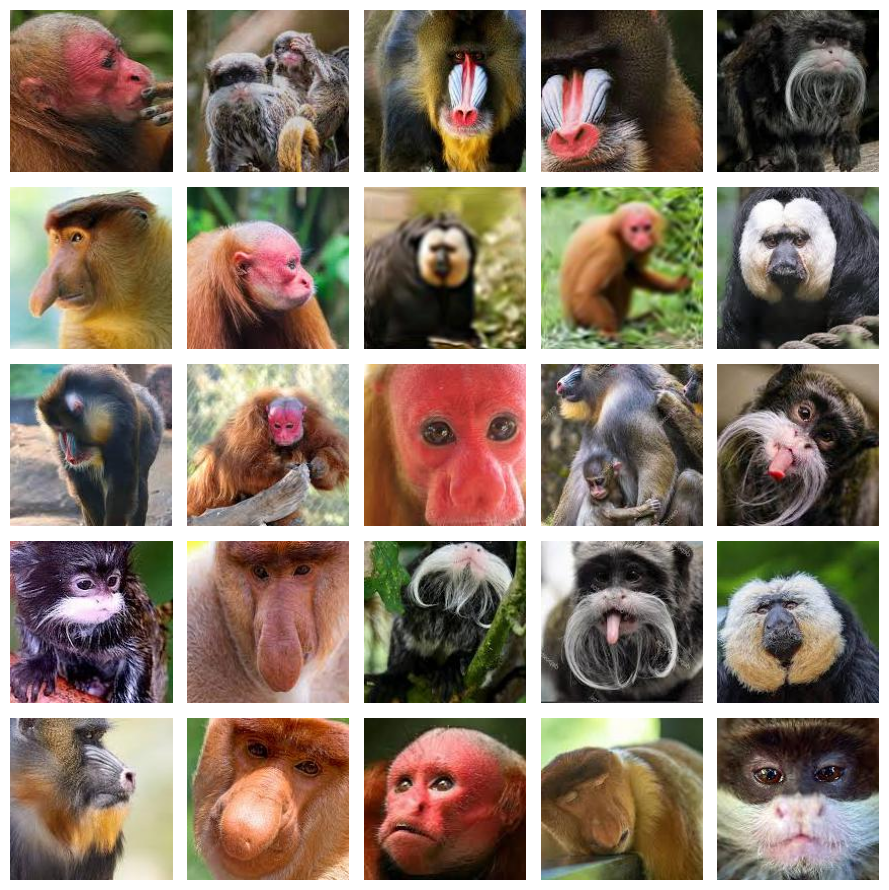

In [75]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(5, 5, figsize=(9, 9))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x[i].reshape(160, 160,3), cmap='gray')
    #axes[i].set_title(f"Label: {np.argmax(y_train_encoded[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [76]:
# Flatten images
x_flat = x.reshape(x.shape[0], -1)

In [77]:
print(x_flat.shape)

(500, 76800)


In [78]:
error = [] # for store cost or error value in list for choosing best value of K 

In [79]:
for k in range(1,10): 
    model = KMeans(n_clusters=k,n_init= 'auto',init='k-means++')
    model.fit(x_flat)
    error.append(model.inertia_)

In [80]:
print(error)

[2259206.7607978783, 2003669.2805221232, 1893478.1321632124, 1836316.463771776, 1788864.5300591027, 1754137.8389127203, 1711411.2817256106, 1701213.5159573385, 1702315.8334084263]


Text(0, 0.5, 'Error')

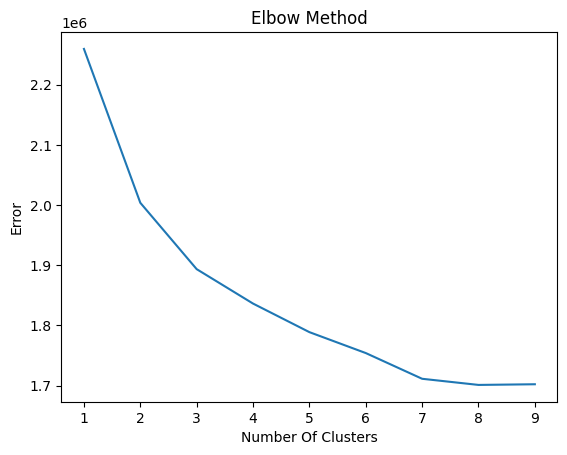

In [81]:
plt.plot(range(1,(len(error)+1)) ,error )
plt.title('Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('Error')

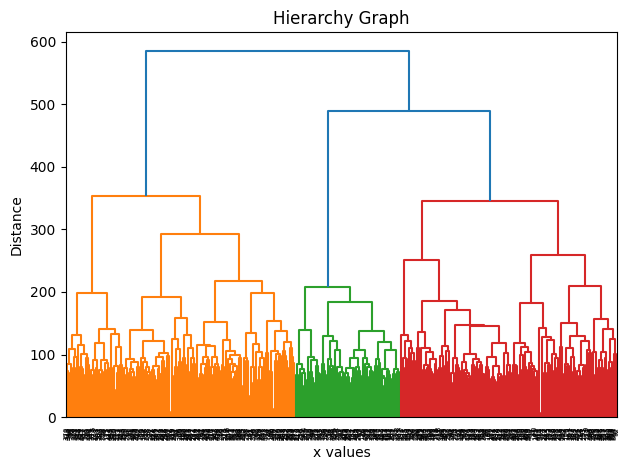

In [82]:
hc = sch.dendrogram(sch.linkage(x_flat[:500,:],method='ward'))
plt.title('Hierarchy Graph')
plt.xlabel('x values')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

From above graphs , the best value for k (Number of Clusters) is 5 , K =5

In [83]:
Model = KMeans(n_clusters=5,n_init='auto',init='k-means++')
Model.fit(x_flat)
ypred = Model.predict(x_flat)

centers = Model.cluster_centers_
error = Model.inertia_
lables = set(Model.labels_)

print('Centers : ',centers)
print('Cost : ',error)
print('Labels : ',lables)

Centers :  [[0.24646275 0.2601098  0.18412549 ... 0.2732549  0.25907451 0.19124706]
 [0.71847265 0.70319917 0.63942208 ... 0.63013416 0.61692466 0.50732714]
 [0.36526193 0.4133743  0.2794264  ... 0.37664618 0.36906643 0.28861574]
 [0.49360982 0.52780364 0.42186486 ... 0.3736211  0.35711666 0.27157568]
 [0.51055989 0.54008977 0.39678715 ... 0.59078668 0.55506733 0.41875738]]
Cost :  1798506.0479935752
Labels :  {0, 1, 2, 3, 4}


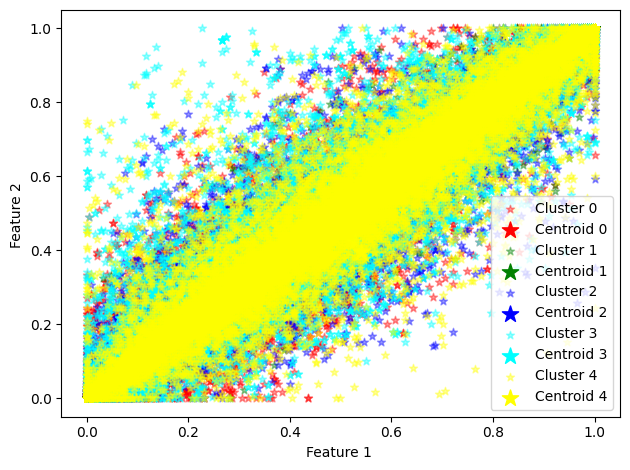

In [88]:
i=1

plt.scatter(x[ypred==0,i],x[ypred==0,i+1], color='red',alpha=0.4,label='Cluster 0',marker='*')
plt.scatter(centers[0,i],centers[0,i+1],color='red',s=150,marker='*',label='Centroid 0')

plt.scatter(x[ypred==1,i],x[ypred==1,i+1], color='green',alpha=0.4,label='Cluster 1',marker='*')
plt.scatter(centers[1,i],centers[1,i+1],color='green',s=150,marker='*',label='Centroid 1')

plt.scatter(x[ypred==2,i],x[ypred==2,i+1], color='blue',alpha=0.4,label='Cluster 2',marker='*')
plt.scatter(centers[2,i],centers[2,i+1],color='blue',s=150,marker='*',label='Centroid 2')

plt.scatter(x[ypred==3,i],x[ypred==3,i+1], color='cyan',alpha=0.4,label='Cluster 3',marker='*')
plt.scatter(centers[3,i],centers[3,i+1],color='cyan',s=150,marker='*',label='Centroid 3')

plt.scatter(x[ypred==4,i],x[ypred==4,i+1], color='yellow',alpha=0.4,label='Cluster 4',marker='*')
plt.scatter(centers[4,i],centers[4,i+1],color='yellow',s=150,marker='*',label='Centroid 4')

plt.xlabel('Feature 1 ')
plt.ylabel('Feature 2 ')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [85]:
print(ypred.shape)

(500,)


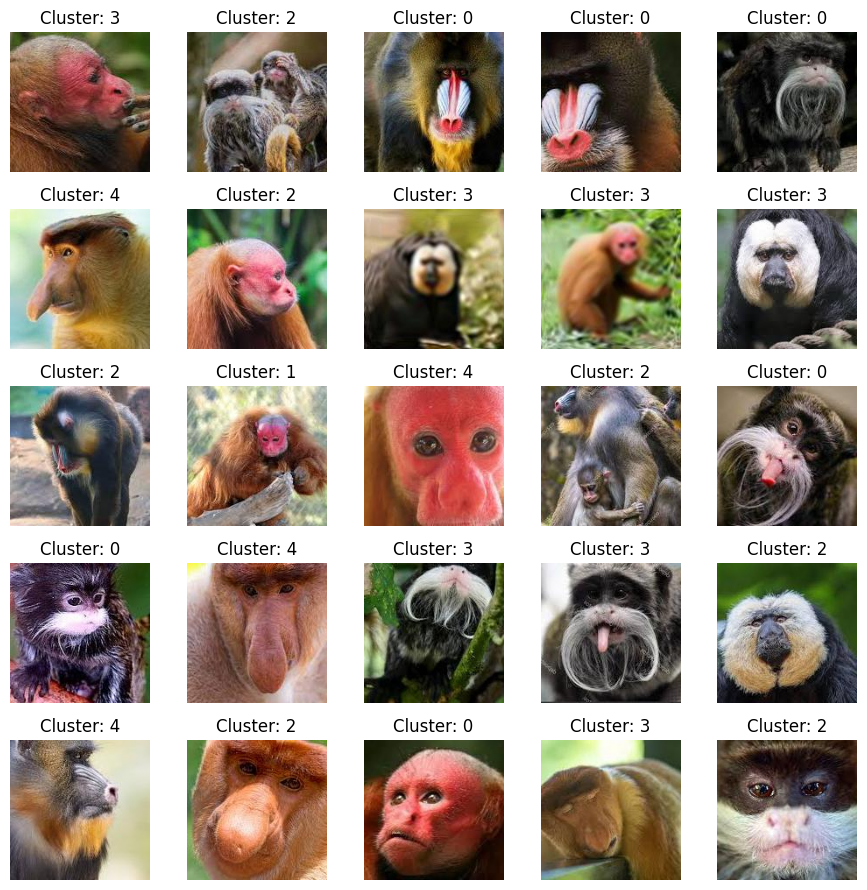

In [86]:
# Visualize sample images with predicted cluster
fig, axes = plt.subplots(5, 5, figsize=(9, 9))
axes = axes.ravel()
for i in range(25):
    axes[i].imshow(x[i].reshape(160, 160,3), cmap='gray')
    axes[i].set_title(f"Cluster: {ypred[i]}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()